In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib

In [2]:
%run Grid.py 


# Questions

 - agent must move, one to an adjascent spot, cannot hold position <br>
 - can agent gain reward everytime a position is visited ? <br>
 - how to deal with optimal path + colelction of rewards? <br>

# Define States and Actions

In [3]:
S = list(range(0,36))
print(S)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


In [4]:
A = list(range(0,36))
print(A)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


# Define Rewards Matrix

In [5]:
R = np.empty((len(A), len(S)) )
R[:] = np.nan
print(str(R[:1]))

[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]


### Define legal moves

In [6]:
possible_actions = []

for row in range(0,6):
    for col in range(0, 6):
        current = row * 6 + col

        if col > 0:
            left = current - 1
            possible_actions.append((current, left))
        if col < 5:
            right = current + 1
            possible_actions.append((current, right))
        if row > 0:
            up = current - 6
            possible_actions.append((current, up))
        if row < 5:
            down = current + 6
            possible_actions.append((current, down))

print("# possible moves:", len(possible_actions))            
print(possible_actions)

# possible moves: 120
[(0, 1), (0, 6), (1, 0), (1, 2), (1, 7), (2, 1), (2, 3), (2, 8), (3, 2), (3, 4), (3, 9), (4, 3), (4, 5), (4, 10), (5, 4), (5, 11), (6, 7), (6, 0), (6, 12), (7, 6), (7, 8), (7, 1), (7, 13), (8, 7), (8, 9), (8, 2), (8, 14), (9, 8), (9, 10), (9, 3), (9, 15), (10, 9), (10, 11), (10, 4), (10, 16), (11, 10), (11, 5), (11, 17), (12, 13), (12, 6), (12, 18), (13, 12), (13, 14), (13, 7), (13, 19), (14, 13), (14, 15), (14, 8), (14, 20), (15, 14), (15, 16), (15, 9), (15, 21), (16, 15), (16, 17), (16, 10), (16, 22), (17, 16), (17, 11), (17, 23), (18, 19), (18, 12), (18, 24), (19, 18), (19, 20), (19, 13), (19, 25), (20, 19), (20, 21), (20, 14), (20, 26), (21, 20), (21, 22), (21, 15), (21, 27), (22, 21), (22, 23), (22, 16), (22, 28), (23, 22), (23, 17), (23, 29), (24, 25), (24, 18), (24, 30), (25, 24), (25, 26), (25, 19), (25, 31), (26, 25), (26, 27), (26, 20), (26, 32), (27, 26), (27, 28), (27, 21), (27, 33), (28, 27), (28, 29), (28, 22), (28, 34), (29, 28), (29, 23), (29, 35),

In [7]:
walls = [(3,4), (3,9), (4,5), (11,17), (17,23), (12,18), (18,24), (30,31), (27,33), (29,35)]

illegal_moves = [] 

for wall in walls:
    illegal_moves.append((wall[0], wall[1]))
    illegal_moves.append((wall[1], wall[0]))
    
print("# illegal moves:", len(illegal_moves))
print(illegal_moves)

# illegal moves: 20
[(3, 4), (4, 3), (3, 9), (9, 3), (4, 5), (5, 4), (11, 17), (17, 11), (17, 23), (23, 17), (12, 18), (18, 12), (18, 24), (24, 18), (30, 31), (31, 30), (27, 33), (33, 27), (29, 35), (35, 29)]


In [8]:
for illegal_move in illegal_moves:
    possible_actions.remove(illegal_move)

print("# legal moves:", len(possible_actions))
print(possible_actions)

# legal moves: 100
[(0, 1), (0, 6), (1, 0), (1, 2), (1, 7), (2, 1), (2, 3), (2, 8), (3, 2), (4, 10), (5, 11), (6, 7), (6, 0), (6, 12), (7, 6), (7, 8), (7, 1), (7, 13), (8, 7), (8, 9), (8, 2), (8, 14), (9, 8), (9, 10), (9, 15), (10, 9), (10, 11), (10, 4), (10, 16), (11, 10), (11, 5), (12, 13), (12, 6), (13, 12), (13, 14), (13, 7), (13, 19), (14, 13), (14, 15), (14, 8), (14, 20), (15, 14), (15, 16), (15, 9), (15, 21), (16, 15), (16, 17), (16, 10), (16, 22), (17, 16), (18, 19), (19, 18), (19, 20), (19, 13), (19, 25), (20, 19), (20, 21), (20, 14), (20, 26), (21, 20), (21, 22), (21, 15), (21, 27), (22, 21), (22, 23), (22, 16), (22, 28), (23, 22), (23, 29), (24, 25), (24, 30), (25, 24), (25, 26), (25, 19), (25, 31), (26, 25), (26, 27), (26, 20), (26, 32), (27, 26), (27, 28), (27, 21), (28, 27), (28, 29), (28, 22), (28, 34), (29, 28), (29, 23), (30, 24), (31, 32), (31, 25), (32, 31), (32, 33), (32, 26), (33, 32), (33, 34), (34, 33), (34, 35), (34, 28), (35, 34)]


### Add rewards

In [9]:

default_reward = 0 
reward = 5 
reward_loc = [5, 16, 19]
penalty = -5 
penalty_loc = [8, 17, 34] 
dst_reward = 100 
dst = 35
highlight_cells = [] 

for action in possible_actions:
    #action can result in a rewards
    for loc in reward_loc:
        if action[1] == loc:
            R[action[0], action[1]] = reward
            highlight_cells.append(action)
            break
        else:
            continue
        break
    else:
        #action can result in a penalty 
        for loc in penalty_loc:
            if action[1] == loc:
                R[action[0], action[1]] = penalty 
                highlight_cells.append(action)
                break
            else:
                continue
            break
        else:
            #action can result in the destination 
            if action[1] == dst:
                R[action[0], action[1]] = dst_reward
                highlight_cells.append(action)
            else:
                R[action[0], action[1]] = default_reward
              

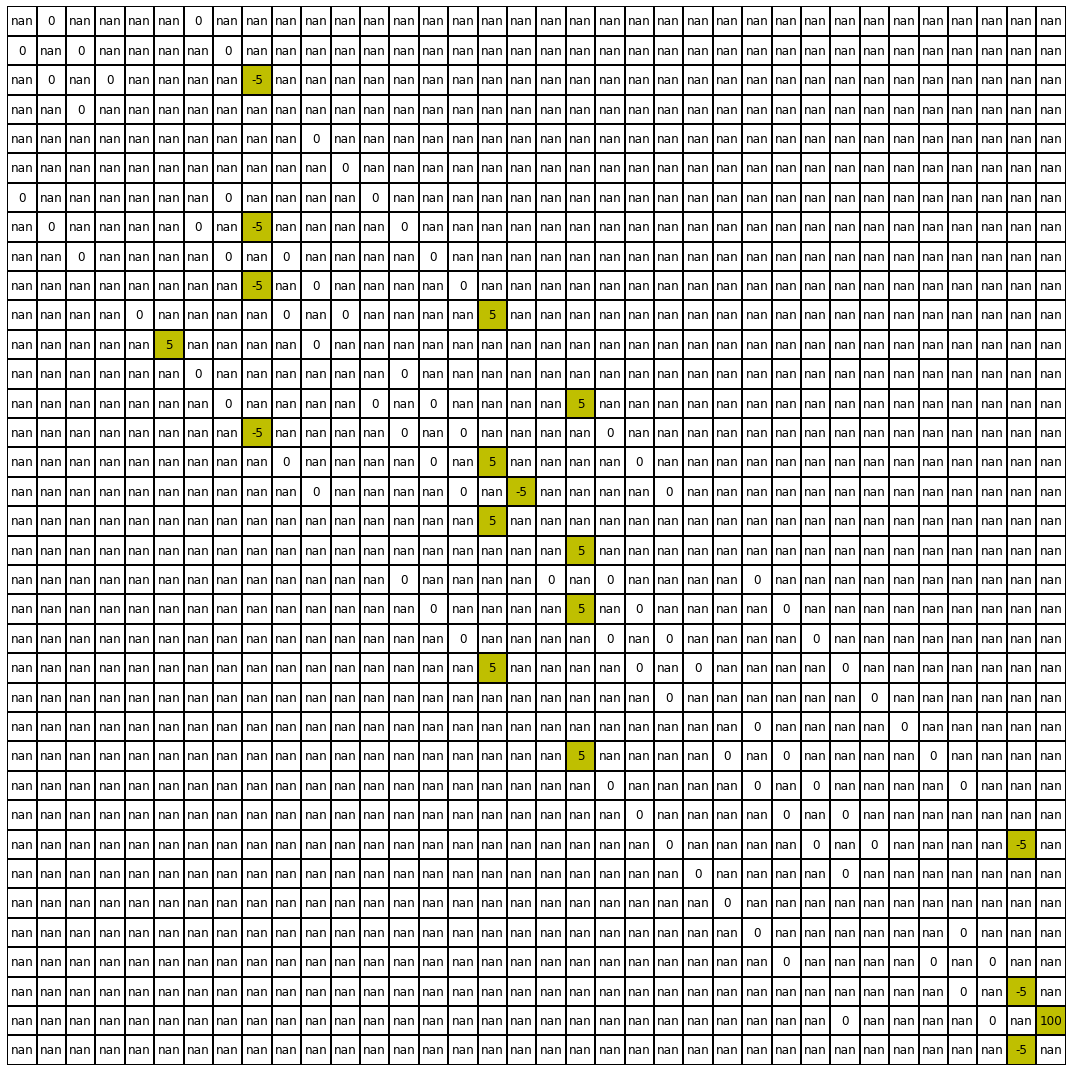

In [10]:
plt.rcParams["figure.figsize"] = (15, 15)
Rmatrix = Grid(36, 36, R)
#myBoard.drawGrid()
Rmatrix.drawPath(highlight_cells)

##check this later 
################################
##  0----------------------->35
##  |
##  |
##  |  
##  |
##  |
## 35
################################


# Define Q Matrix


In [11]:
Q = np.zeros(R.shape)

print('Q matrix: \n\n{}'.format(Q))

Q matrix: 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Running Q learning algorithm 

In [14]:
R[0]

array([nan,  0., nan, nan, nan, nan,  0., nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [15]:
np.where(~np.isnan(R[0]))[0]

array([1, 6])

In [52]:
#should we randomize initial state 
s = 0
num_of_episodes = 50000

Q = np.zeros(R.shape)


#learning params
# Learning params
alpha = 1
gamma = 0.8
epsilon=0.9


for i in range(num_of_episodes):
    available_actions = np.where(~np.isnan(R[s]))[0]
    #print("Available actions from state '{}' are: {}".format(S[s], [A[x] for x in available_actions]))
    
    q_values = [Q[s,a] for a in available_actions]
    #print('Q values for those actions from current state: {}'.format(q_values))
    
    best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
    best_actions_q_values = [Q[s,x] for x in best_actions]
    
    #if len(best_actions) > 1:
    #    print('Detected multiple actions with identical Q values. Agent will randomly select one of these.')
    #    print('Our best available actions from here are: {} with current q values: {}'.format(
    #        [A[x] for x in best_actions], best_actions_q_values))
    
    # Epsilon-greedy
    if np.random.uniform() > epsilon:
        a = np.random.choice(available_actions)
        #print("Selecting random action '{}' with current Q value {}".format(A[a], Q[s,a]))
    else:
        a = np.random.choice(best_actions)
        #print("Selecting greedy action '{}' with current Q value {}".format(A[a], Q[s,a]))
        
     # Environment updating
    r = R[s,a]
    #print("Reward for taking action '{}' from state '{}': {}".format(A[a], S[s], r))

    s_old = s
    s = a # here, the transition function is deterministic. Next state corresponds simply to the action taken.
    #print("After taking action '{}' from state '{}', new state is '{}'".format(A[a], S[s_old], S[s]))

    # Q value updating
    q_updated = Q[s_old,a] + alpha * ( r + gamma * np.max(Q[s,:]) - Q[s_old,a])
    Q[s_old,a] = q_updated
    
    #print("Q value update: " \
    #      "Q({},{}) = Q({},{}) + alpha*(r({},{}) + gamma*max(Q[{},:]) - Q[{},{}]) ".format(
    #    S[s_old], A[a], S[s_old], A[a], S[s_old], A[a], S[s],S[s_old], A[a]))

    #print("Q matrix update: " \
    #      "Q({},{}) = {} + {}*({} + {}*{} - {}) = {}".format(
    #    S[s_old], A[a], Q[s_old,a].round(0), alpha, r, gamma, np.max(Q[s,:]).round(0), 
    #    Q[s_old,a].round(0), q_updated))

    if ( (i == 0) or (i == num_of_episodes-1)): 
        print('Q matrix updated: \n\n {}'.format(Q.round(0)))

    if S[s] == dst:
        print("Goal state '{}' reached. Ending episode '{}'.".format(dst, i))
        print('Q matrix updated: \n\n {}'.format(Q.round(0)))
        break

        
    

Q matrix updated: 

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Goal state '35' reached. Ending episode '19139'.
Q matrix updated: 

 [[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0.   0.]]


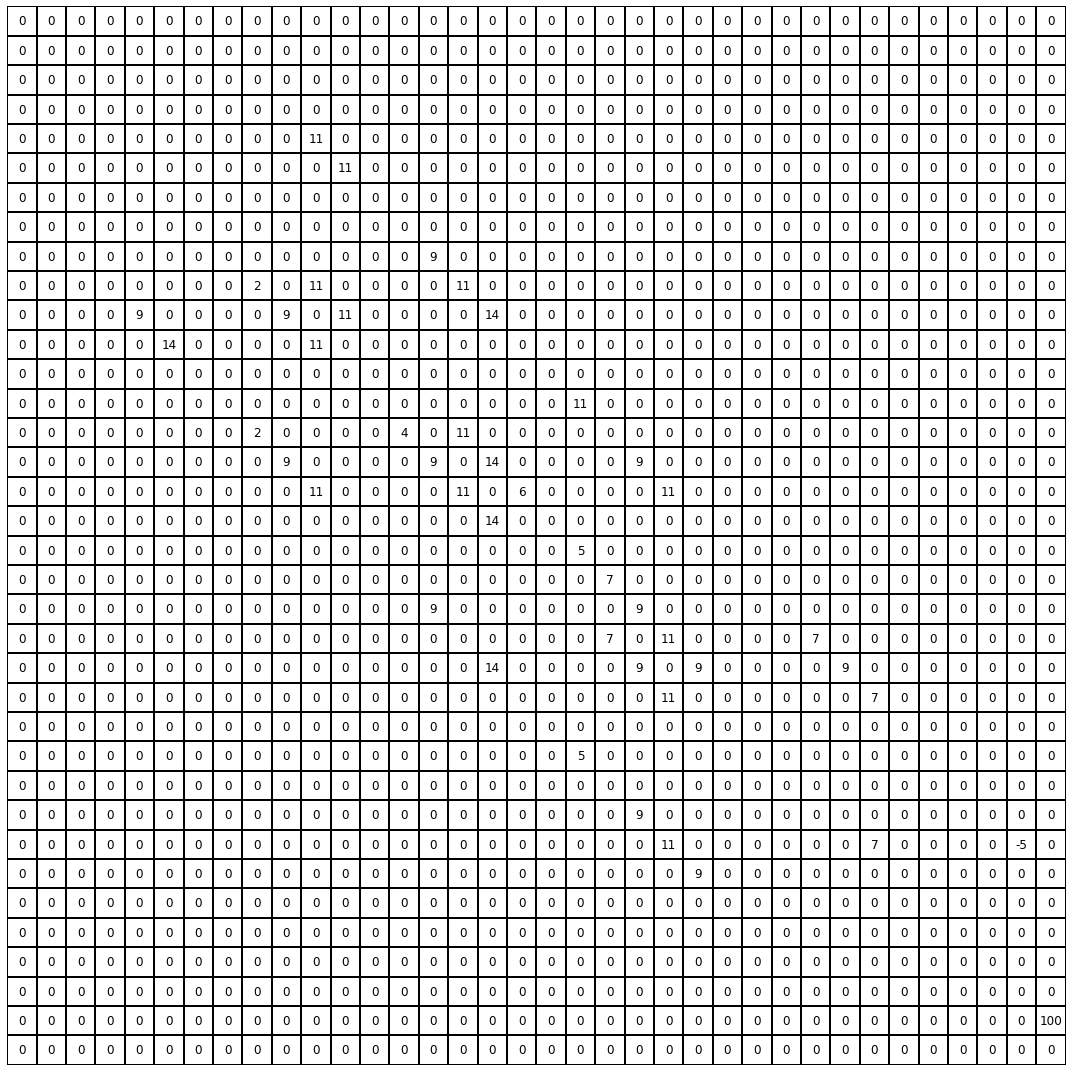

In [53]:
plt.rcParams["figure.figsize"] = (15, 15)
Qmatrix = Grid(36, 36, Q)
Qmatrix.drawGrid()
#Qmatrix.drawPath(highlight_cells)


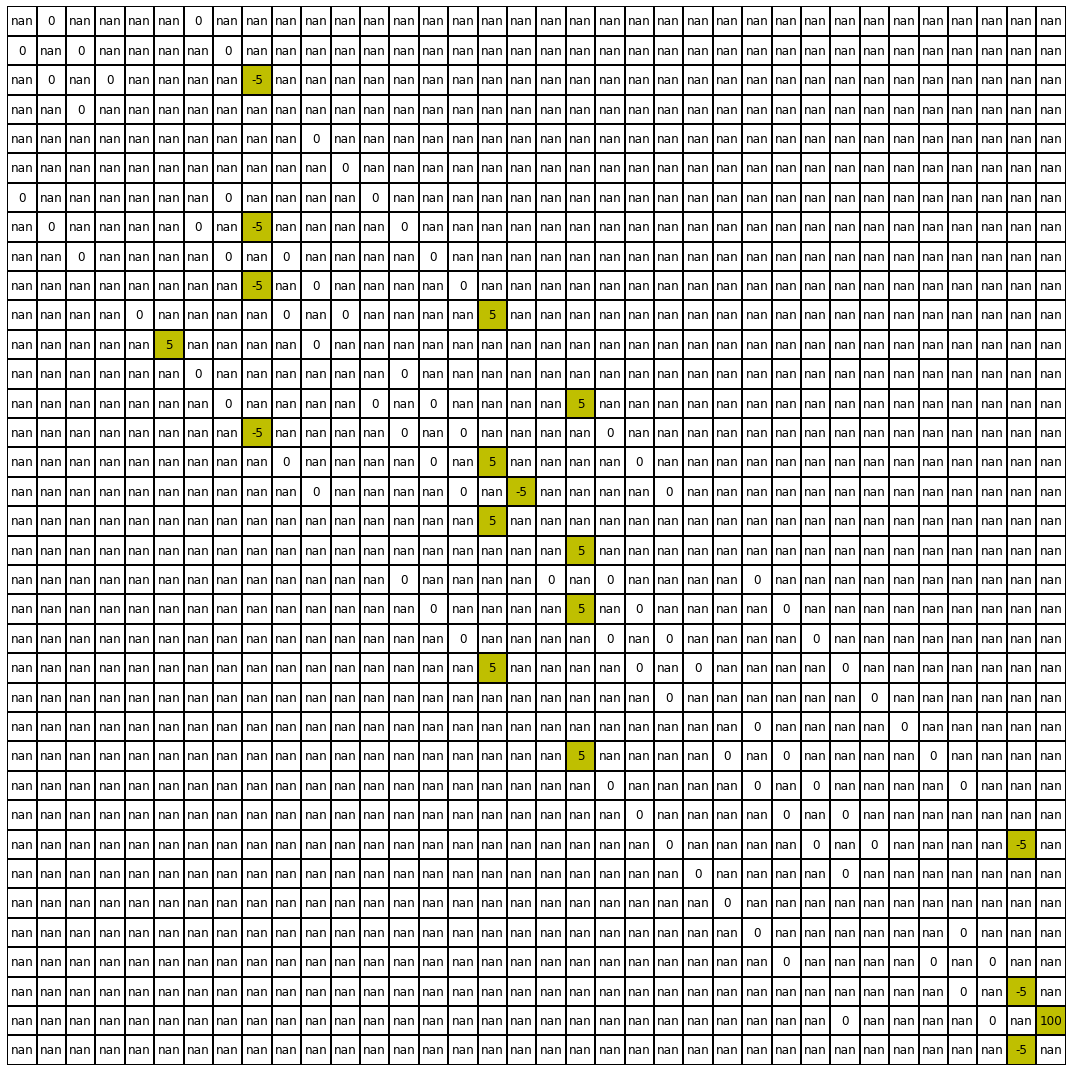

In [37]:
plt.rcParams["figure.figsize"] = (15, 15)
Rmatrix = Grid(36, 36, R)
#Qmatrix.drawGrid()
Rmatrix.drawPath(highlight_cells)
